# **HW1: Data Analysis and Visualization with Pandas and Matplotlib**

#### **Attention:** *This assignment is to be completed individually. Group work is not permitted.*


### **TODO: Please Write Your Full Name here**

## **NAME: Steven Yoo**



## **Getting the Dataset for the Homework**

* [University of California, Irvine Machine Learning Repository](https://archive.ics.uci.edu/) is a popular resource for many classic datasets used in machine learning and statistics. It contains a number of freely available datasets for learners to practice and improve their data analysis and machine learning skills or conduct experiments for their reseach. We will use one of the datasets from this repository for HW1.

**Dataset Citation:** Schlimmer,Jeffrey. (1987). Automobile. UCI Machine
Learning Repository. https://doi.org/10.24432/C5B01C.


#### **Installing datasets from the web:**

Unlike the HW0 and the in-class exercise where we uploaded a dataset to Colab from our local machine, we will download a dataset that is available on the web by using a utility method called **`wget`**, a free, network downloader that is used to download files from a web server.


The **`!`** symbol before the `wget` you will see below is a Jupyter specific requirement and is used to run shell commands directly from the notebook cell because Jupyter notebook provides an interface to the underlying shell (e.g., bash on Linux/macOS or cmd on Windows). This symbol allows users to execute [command-line](https://en.wikipedia.org/wiki/Command-line_interface) operations without having to leave the Jupyter environment. Prefixing a command with **`!`** allows the notebook to recognize that the following command is intended for the shell rather than the Python interpreter.

### **Load the Data:** Run the following line to download the data from the web and notice that the dataset is downloaded in your folder.

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data -O automobile.csv

--2023-09-05 00:21:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘automobile.csv’

automobile.csv          [ <=>                ]  25.33K   164KB/s    in 0.2s    

2023-09-05 00:22:01 (164 KB/s) - ‘automobile.csv’ saved [25936]



### **Mount Google Drive**

In [10]:
# This is specifically for Google Colab, you need to mount the Google drive first

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Q1: Load the Dataset into a Pandas DataFrame**


We will need a pandas dataframe to be able to analyze the dataset that is in the CSV file. Let's first `import` the Pandas library.

In [11]:
import pandas as pd

* If you open (double click) the `automobile.csv` file you downloaded, you will notice that it lacks a header (column names). To address this, we can utilize the `names` parameter from the `read_csv` function in pandas. This parameter enables us to assign column names to each data point separated by commas, effectively treating them as distinct columns. But we first need to define the column names. We get the column names for this dataset based on the documentation. See "Attribute Information": https://archive.ics.uci.edu/dataset/10/automobile



In [12]:
# Create a python "list" for column names.
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]

* We are now ready to create the dataframe using the `read_csv()` function from pandas library. But there is one more thing we will have to be careful about. When we opened the file, we noticed that there were rows an columns where a `?` was placed. This is a common practice for dataset creators to fill the missing values with some characters or strings such as `?`, '999`, 'NA`, etc. This is also why when analyzing datasets, it's essential to refer to the dataset's documentation or metadata (if available) to understand how missing values are represented.

* Since we identified how this specific dataset represents missing values, we can use a very handy parameter from `read_csv` function, `na_values` which specifies additional strings to recognize as NaN (Not a Number), which means missing or null values. `na_values="?"` argument indicates that any occurrence of the "?" string in the dataset should be treated as a NaN value. This parameter will allow us to correctly process our dataset and we handle the missing values appropriately.



Now with all this new knowledge you learned about `na_values` , let's create the dataframe.


In [13]:
# Create the dataframe, using pandas `read_csv` by using the na_values parameter discussed above.
df = pd.read_csv('automobile.csv', index_col = False, na_values = "?", names = column_names)
#Display the first few rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### **Q2: Explore the Dataset**

**2.1 Get the shape of the dataset**




In [14]:
df.shape

(205, 26)

**2.2 Check for missing values: Sum how many missing values are in each column**

*Note: If we did not use `na_values`, we would get a 0 for missing values for all rows, as pandas read_csv would interpret the `?` symbol as `object`, i.e. a string.*

In [15]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

**2.3 What are the data types in each column?**

In [16]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**2.4 Filter cars with a price above the average price**
* Store your 'subset' with filtered cars whose price is above the average of all cars in a dataframe named `above_the_average_price` and return the first few rows from it.

In [17]:
# subset data
above_the_average_price = df[df['price'] > df['price'].mean()]

# return first few rows
above_the_average_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**2.5 Group the cars by `make` and get the average `price` for each make.**

Store them in a dataframe named `average_price_by_make` and sort them in descending order.

In [18]:
# subset data and store
average_price_by_make = df.groupby('make')['price'].mean()

# sort in descending order
average_price_by_make.sort_values(ascending = False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

### **Q3 Visualize the Dataset Using Matplotlib**


**3.1: Plot a histogram of the `horsepower` column.**

Using the given dataset, create a histogram to visualize the distribution of the `horsepower` column. Follow the guidelines below to ensure your visualization is informative:

* Drop any missing values from the horsepower column before plotting.
* Use 20 bins for your histogram.
* Set the color of the bars to any color you like with an `alpha` (transparency) of 0.7.
* The figure size should be 15 units in width and 6 units in height.
* The title of the plot should be "Distribution of Horsepower".
* Label the x-axis as "Horsepower" and the y-axis as "Number of Cars".
* (Optional) For better readability, rotate the x-axis labels by 45 degrees.
Display a grid in the plot for clarity.

*Tip: If your chart appears cluttered, consider adjusting the figure size to at least 15 x 6 or more for better clarity and readability.*

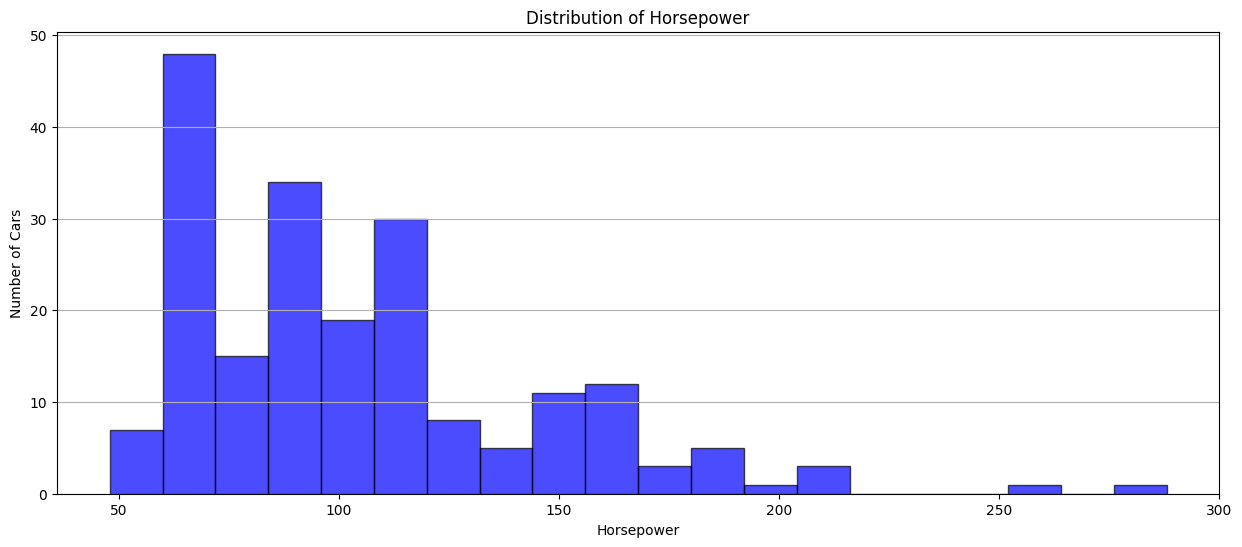

In [19]:
import matplotlib.pyplot as plt

# define size of plot
plt.figure(figsize=(15, 6))

# create histogram
plt.hist(df['horsepower'].dropna(), bins = 20, color = 'blue', alpha = 0.7, edgecolor = 'black')

# plot labels
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Number of Cars')

# add horizontal lines
plt.grid(axis='y')

# display the plot
plt.show()

**3.2: Plot a bar chart of the `make` column, showing the count of each make.**

Using the dataset, create a bar chart to visualize the number of cars for each manufacturer (or "make") in the dataset. Follow the guidelines below to ensure your visualization is informative:

* Compute the value counts of the make column to determine the number of cars for each manufacturer.
* Use a figure size of 15 units in width and 6 units in height for your plot.
* Set the color of the bars to purple with an alpha (transparency) of 0.7.
* The title of your plot should be "Number of Cars by Make".
* Label the x-axis as "Make" and the y-axis as "Number of Cars".
* (Optional) For better readability, rotate the x-axis labels by 45 degrees.
* Display a grid along the y-axis to aid in readability.




pandas [value_counts](https://www.educative.io/answers/what-is-valuecounts-in-pandas) function could be useful here.

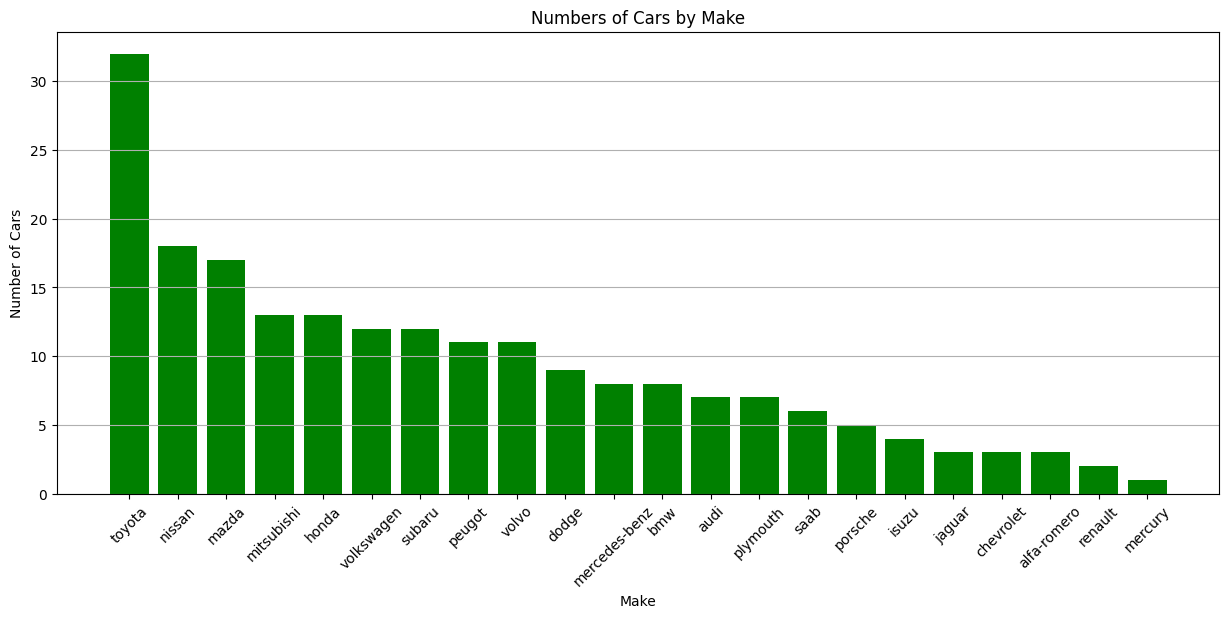

In [20]:
# create bar chart
num_cars_per_manufacturer = df['make'].value_counts()

# define plot size
plt.figure(figsize=(15, 6))

# create bar chart
plt.bar(num_cars_per_manufacturer.index, num_cars_per_manufacturer.values, color='green')

# plot labels
plt.title('Numbers of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Number of Cars')

# rotate x-axis label
plt.xticks(rotation = 45)

# add horizontal grid lines
plt.grid(True, axis = 'y')

# display the plot
plt.show()

**3.3: Plot a scatter plot between price and horsepower.**

Using the provided dataset, create a scatter plot to visualize the relationship between the horsepower of a car and its price. Follow the guidelines below to ensure your visualization is informative:

* Use the horsepower column values for the x-axis and the price column values for the y-axis.
* Set the alpha (transparency) of the data points to 0.6.
* The title of your plot should be "Scatter plot between Price and Horsepower".
* Label the x-axis as "Horsepower" and the y-axis as "Price".
* Enable the grid on your plot for clarity.


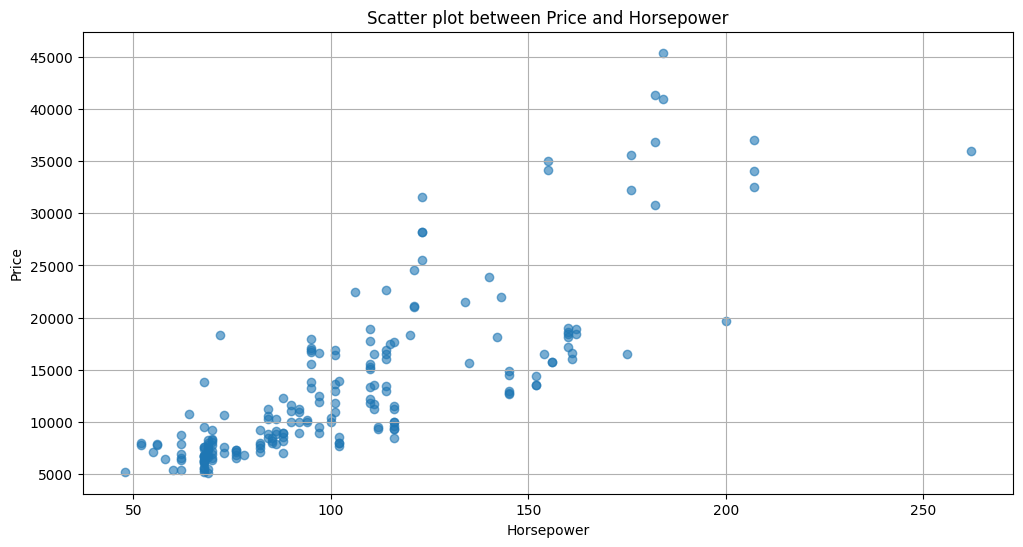

In [21]:
# define plot size
plt.figure(figsize=(12, 6))

# create scatterplot
plt.scatter(df['horsepower'], df['price'], alpha = 0.6)

# plot labels
plt.title('Scatter plot between Price and Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')

# display grid lines
plt.grid(True)

# display the plot
plt.show()

**3.4 Based on the scatter plot, histogram, and bar chart you've visualized, can you describe any patterns, trends, or insights you observe in the data?**

**TODO:** *Write your answer to the question #3.4 here in 2-3 sentences for each plot you have visualized above.*

Some questions you can think of while writing up your thoughts:

* Which range of horsepower is the most common among the cars in the dataset?
* Which manufacturer has the highest number of cars in the dataset?
* Is there any noticeable relationship between the horsepower and the price of the cars? If yes, describe it.
* Are there any "outliers" or "clusters" of data points that stand out?

In [ ]:
# The histogram shows that a horsepower range of about 60 - 110 is most common among the cars in the dataset.
# In the histogram, 2 outliers stand out. There is a car with a horsepower of about 260, and another car with a horsepower of about 280.

# The bar chart shows that Toyota the highest numbers of cars in the dataset by a significant margin compared to other makes. The other
# makes have a similar number of cars compared to its neighbors, but Toyota has significantly more cars than the make with the second highest number of cars (Nissan).

# The scatterplot shows a positive correlation between horsepower and price, meaning generally as horsepower increases, price also increases. There is a large
# cluster occuring at a horsepower of ~60 and price of ~7500, meaning there is a large concentration of cars in that range.